In [9]:
import zipline
%matplotlib inline
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


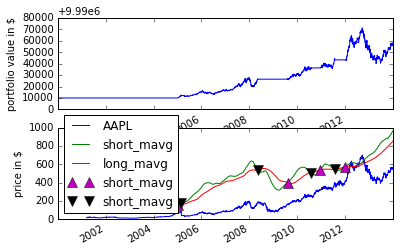

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 21:00:00,NaN,0.000000,0.000000,-0.065800,-0.009549,0.000000,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,1,[],0.0658
2000-01-04 21:00:00,NaN,0.000000,0.000000,-0.064900,-0.047528,0.323229,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,2,[],0.0649
2000-01-05 21:00:00,NaN,0.000000,0.000000,-0.066200,-0.045697,0.329321,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,3,[],0.0662
2000-01-06 21:00:00,NaN,0.000000,0.000000,-0.065700,-0.044785,0.298325,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,4,[],0.0657
2000-01-07 21:00:00,NaN,0.000000,0.000000,-0.065200,-0.018908,0.375301,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,5,[],0.0652
2000-01-10 21:00:00,NaN,0.000000,0.000000,-0.065700,-0.007929,0.349070,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,6,[],0.0657
2000-01-11 21:00:00,NaN,0.000000,0.000000,-0.066700,-0.020888,0.326609,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,7,[],0.0667
2000-01-12 21:00:00,NaN,0.000000,0.000000,-0.067200,-0.025183,0.302508,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,8,[],0.0672
2000-01-13 21:00:00,NaN,0.000000,0.000000,-0.066300,-0.013320,0.294168,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,9,[],0.0663
2000-01-14 21:00:00,NaN,0.000000,0.000000,-0.066900,-0.002791,0.283818,0.000000,0,10000000,0.0,...,NaN,0,0,0.000000,10000000,0.0,0.0,10,[],0.0669


In [11]:
%%zipline --start 2000-1-1 --end 2014-1-1 -o perf_dma

from zipline.api import order_target, record, symbol, history
import numpy as np
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = history(100, '1d', 'price').mean()
    long_mavg = history(300, '1d', 'price').mean()

    # Trading logic
    if short_mavg[0] > long_mavg[0]:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(symbol('AAPL'), 100)
    elif short_mavg[0] < long_mavg[0]:
        order_target(symbol('AAPL'), 0)

    # Save values for later inspection
    record(AAPL=data[symbol('AAPL')].price,
           short_mavg=short_mavg[0],
           long_mavg=long_mavg[0])
    
    
def analyze(context, perf):
    perf.to_csv('/tmp/algoout.csv')
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

In [8]:
perf_dma['short_mavg']

NameError: name 'perf' is not defined